# Frequency of Selected Keys

In [1]:
import pandas as pd
import numpy as np
import requests
import xmltodict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#load financial data

#path = r'/Users/annabramslow/Documents/Company2Vec/Data/financials.csv'
main_path = r'/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/Tables/Financials'

#read all files in the folder
import os
files = os.listdir(main_path)
dfs = []
for file in files:
    path = main_path + '/' + file
    df = pd.read_csv(path, index_col=0)
    dfs.append(df)

#concatenate all dataframes
df = pd.concat(dfs, axis=0)

In [3]:
df

,CVR,PublicationDate,AuditClass,ReportType,Currency,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,...,NonCurrentAssets,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity
0,41624310.0,2013-12-16,Regnskabsklasse B,Årsrapport,DKK,NaN,1361.0,NaN,618673.0,115949.0,...,NaN,581640.0,17682.0,581640.0,-839012.0,1420652.0,NaN,NaN,1420652.0,581640.0
1,10287979.0,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,2993428.0,2619814.0,NaN,80576.0,54239.0,...,NaN,3698449.0,1133093.0,4590388.0,3218880.0,1079605.0,212398.0,NaN,1292003.0,4590388.0
2,25976436.0,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,-43640.0,NaN,NaN,3023764.0,204206.0,...,NaN,7287042.0,2954284.0,14457851.0,14418040.0,36204.0,NaN,NaN,36204.0,14457851.0
3,25982908.0,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,126883.0,14210.0,...,NaN,517064.0,166587.0,1242686.0,1239561.0,3125.0,NaN,NaN,3125.0,1242686.0
4,21330507.0,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,-10325.0,NaN,NaN,70884.0,120980.0,...,NaN,328023.0,153500.0,1596309.0,1144293.0,452016.0,NaN,NaN,452016.0,1596309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15122943.0,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,521981.0,NaN,43541.0,2612.0,...,NaN,121567.0,120463.0,388767.0,274950.0,103617.0,10200.0,NaN,113817.0,388767.0
9994,27917836.0,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,588000.0,NaN,NaN,1221000.0,590000.0,...,NaN,5843000.0,1303000.0,7657000.0,6394000.0,1213000.0,NaN,NaN,1213000.0,7657000.0
9995,28332009.0,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,2375753.0,22796.0,...,NaN,1965299.0,14921.0,27941284.0,10011785.0,3033511.0,14454988.0,NaN,17488499.0,27941284.0
9996,19376613.0,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,-410490.0,-399152.0,-780950.0,85931.0,...,NaN,731554.0,NaN,61461031.0,18563013.0,15046197.0,22543666.0,7167820.0,37589863.0,61461031.0


In [4]:
#selected keys
selected_keys = ['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries', 'ProfitLoss', 'OtherFinanceIncome','OtherFinanceExpenses',
                 'NonCurrentAssets','CurrentAssets','CashAndCashEquivalents','Assets', 'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
                 'LongtermLiabilitiesOtherThanProvisions','ShorttermDebtToBanks','LiabilitiesOtherThanProvisions','LiabilitiesAndEquity']

In [5]:
#find columns name from 6th column onwards
columns = df.columns[5:]
columns

Index(['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries',
       'ProfitLoss', 'OtherFinanceIncome', 'OtherFinanceExpenses',
       'NonCurrentAssets', 'CurrentAssets', 'CashAndCashEquivalents', 'Assets',
       'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
       'LongtermLiabilitiesOtherThanProvisions', 'ShorttermDebtToBanks',
       'LiabilitiesOtherThanProvisions', 'LiabilitiesAndEquity'],
      dtype='object')

In [6]:
#check that selected keys are equal to the columns
columns == selected_keys

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## Frequency Plot of Key Occurences

In [7]:
#create new audit class column with only letter
df['audit_class'] = df['AuditClass'].str.extract(r'(Regnskabsklasse|Reporting class) (\w)')[1]

#for each audit class, compute share of values that are not missing per column
shares = df.groupby('audit_class')[columns].apply(lambda x: x.notnull().mean())
shares

,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,OtherFinanceExpenses,NonCurrentAssets,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity
audit_class,,,,,,,,,,,,,,,,
A,0.308081,0.292929,0.136364,1.000000,0.646465,0.525253,0.0,0.959596,0.797980,0.984848,0.984848,0.848485,0.217172,0.141414,0.797980,0.984848
B,0.556862,0.432156,0.177281,0.996904,0.732502,0.641843,0.0,0.910859,0.825891,0.966455,0.985482,0.905454,0.283971,0.189177,0.925132,0.966462
C,0.536550,0.851064,0.676368,0.999772,0.960866,0.839438,0.0,0.989818,0.968541,0.999392,0.999772,0.968769,0.675304,0.466033,0.971884,0.999240
D,0.058824,0.882353,0.294118,1.000000,1.000000,0.882353,0.0,0.882353,1.000000,1.000000,1.000000,0.882353,0.529412,0.352941,0.764706,1.000000


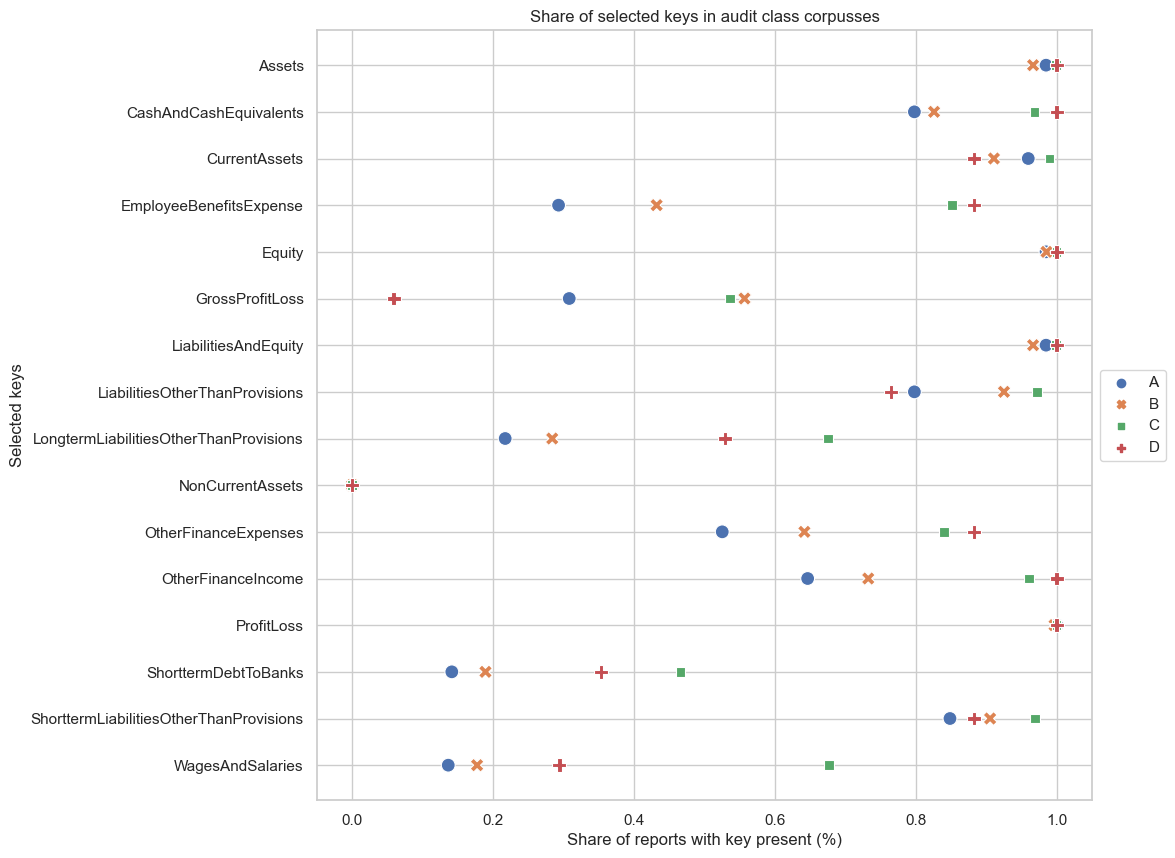

In [8]:
#create a list of shares for each audit class
share_A = shares.loc['A'].values
share_B = shares.loc['B'].values
share_C = shares.loc['C'].values
share_D = shares.loc['D'].values

#plot the share value of the selected keys in each of the audit class corpusses as a combined scatter plot
#the y-axis is the selected keys, the x-axis is the share count of the selected key in the audit class corpus
#the hue is the audit class
#make the shapes of the points different for each audit class
#place legend outside of the plot

df_plot = pd.DataFrame({'key': selected_keys*4, 'share': np.concatenate([share_A, share_B, share_C, share_D]), 
                        'audit_class': ['A']*len(selected_keys) + ['B']*len(selected_keys) + ['C']*len(selected_keys) + ['D']*len(selected_keys)})
df_plot['audit_class'] = df_plot['audit_class'].astype('category')
df_plot['key'] = df_plot['key'].astype('category')

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_plot, x='share', y='key', hue='audit_class', style='audit_class', s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Share of reports with key present (%)')
plt.ylabel('Selected keys')
plt.title('Share of selected keys in audit class corpusses')
plt.show()

## Bar Chart of Audit Class Distribution

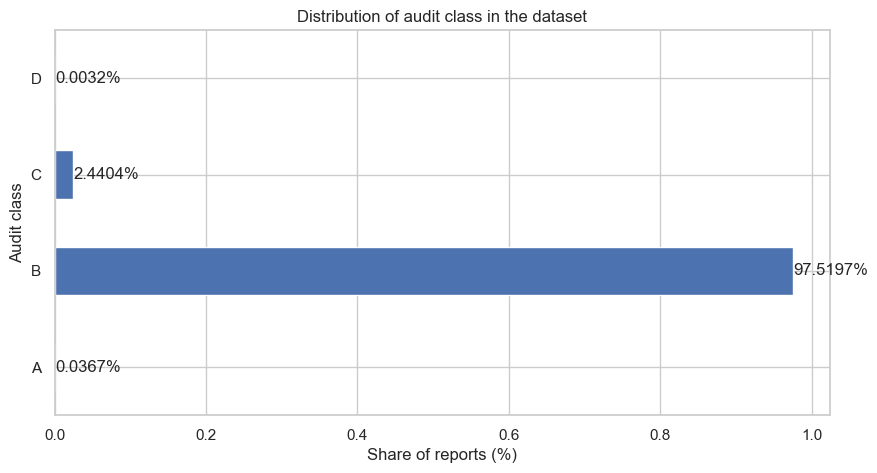

In [21]:
#plot distribution of audit class in the dataset in procent with labels on top of bars
#plot it as a horizontal bar plot

plt.figure(figsize=(10, 5))
df['audit_class'].value_counts(normalize=True).sort_index().plot(kind='barh')
plt.xlabel('Share of reports (%)')
plt.ylabel('Audit class')
plt.title('Distribution of audit class in the sample dataset')
for i, v in enumerate(df['audit_class'].value_counts(normalize=True).sort_index()):
    plt.text(v, i, f'{v:.4%}', va='center')
plt.show()

## Plot of Distribution of no. reports

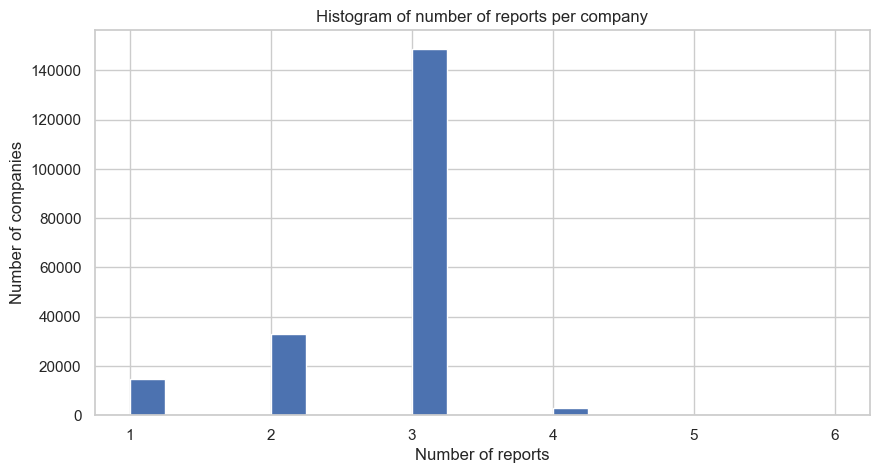

In [31]:
#plot histogram of number of reports per company
#plot it as a histogram with 50 bins

plt.figure(figsize=(10, 5))
df['CVR'].value_counts().plot(kind='hist', bins=20)
plt.xlabel('Number of reports')
plt.ylabel('Number of companies')
plt.title('Histogram of number of reports per company')
plt.show()

## Plot Distribution of keys

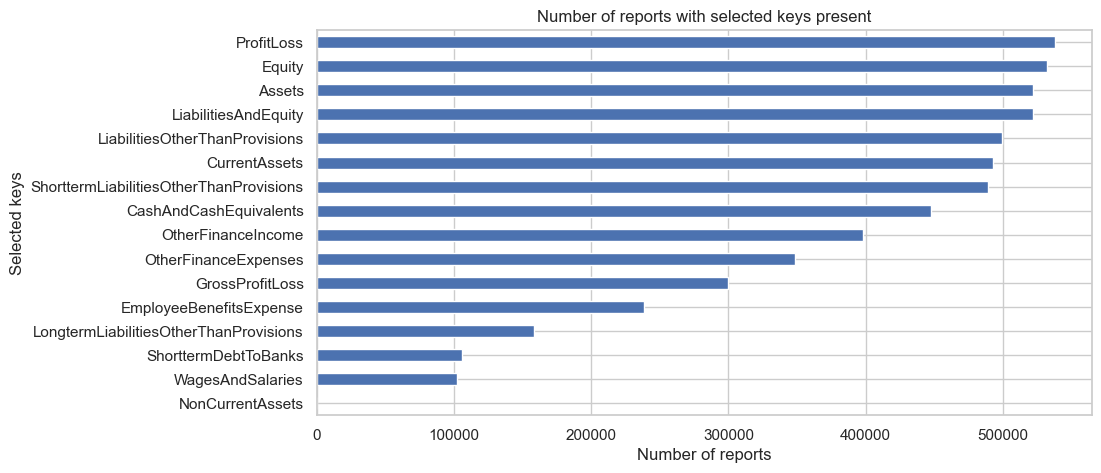

In [28]:
#plot histogram of keys and their occurences in the dataset
# selected keys on y-axis and their occurences on x-axis
#plot it as a horizontal bar plot

plt.figure(figsize=(10, 5))
df[selected_keys].notnull().sum().sort_values().plot(kind='barh')
plt.xlabel('Number of reports')
plt.ylabel('Selected keys')
plt.title('Number of reports with selected keys present')
plt.show()

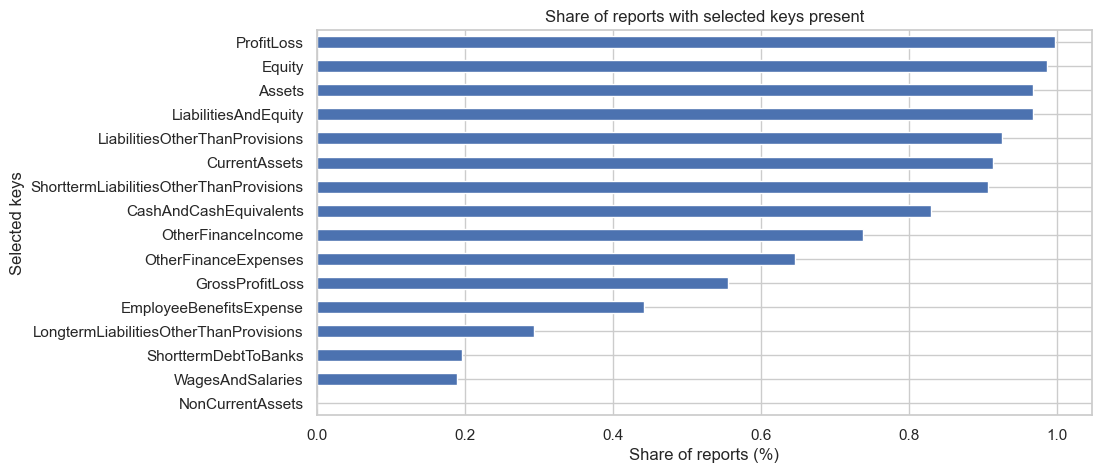

In [34]:
#create the same plot but with their share of occurences in the dataset as the labels on top of the bars

plt.figure(figsize=(10, 5))
df[selected_keys].notnull().mean().sort_values().plot(kind='barh')
plt.xlabel('Share of reports (%)')
plt.ylabel('Selected keys')
plt.title('Share of reports with selected keys present')
# #
plt.show()

## Histogram of Key values

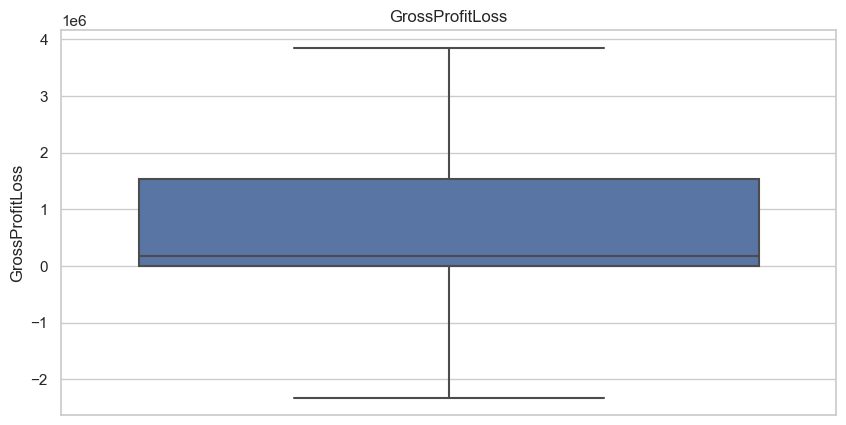

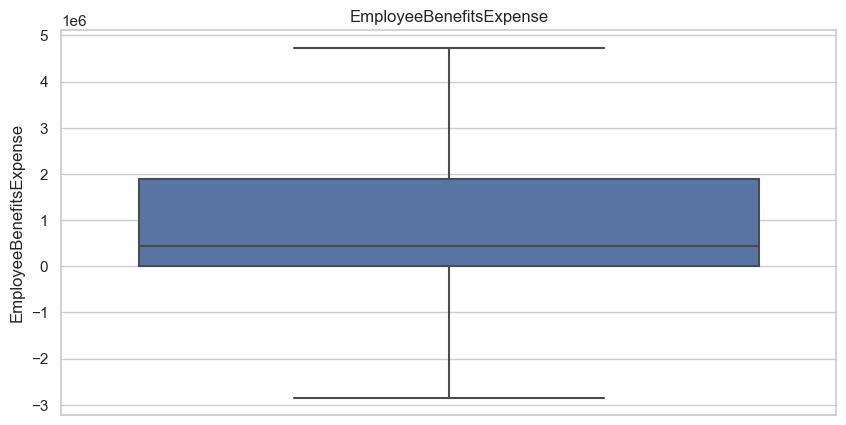

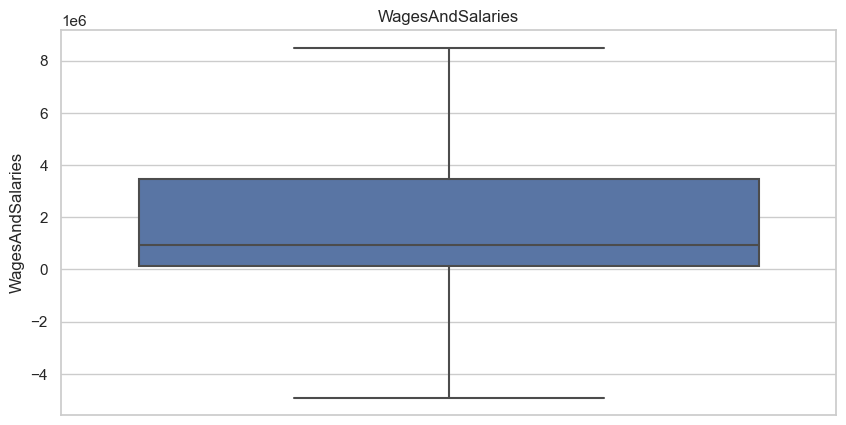

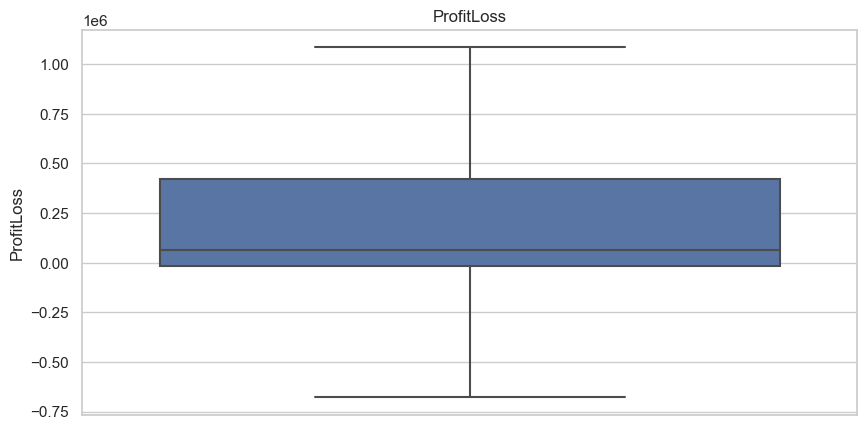

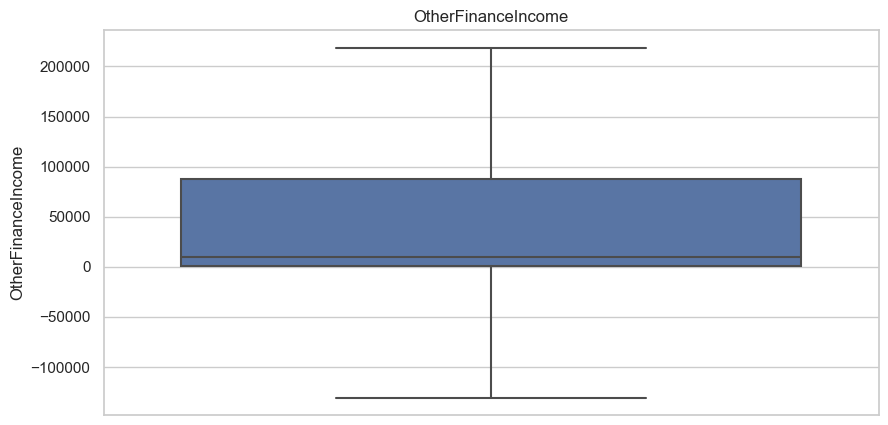

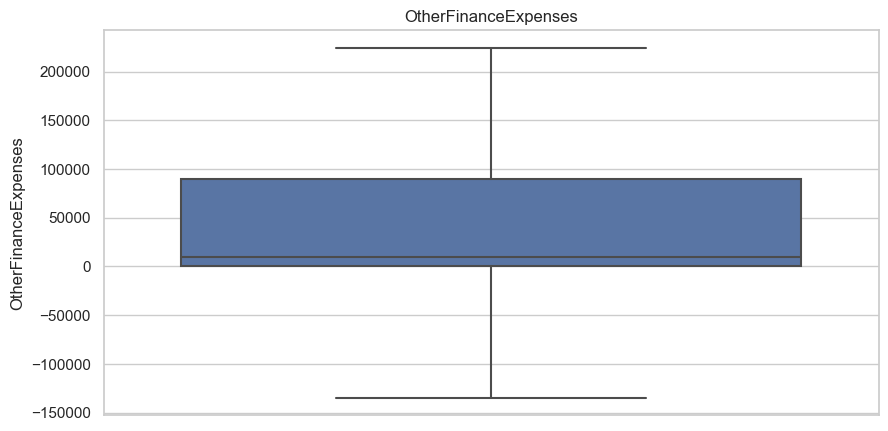

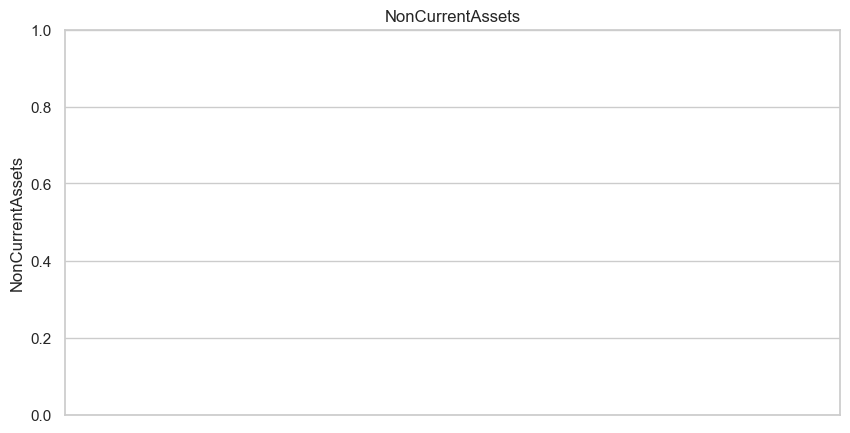

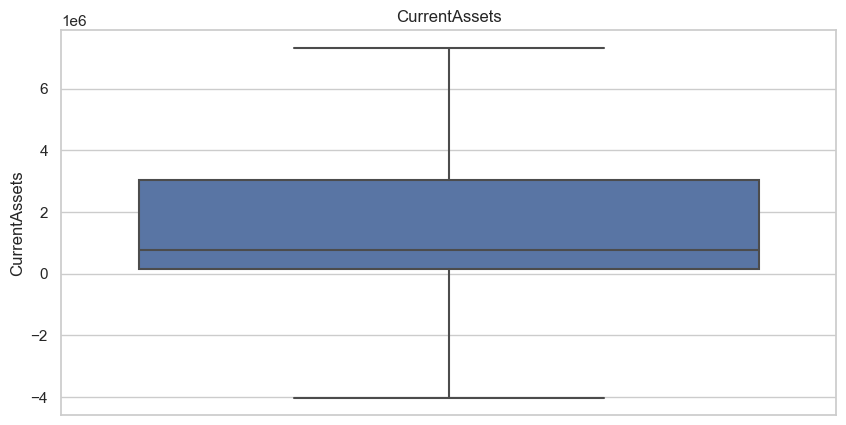

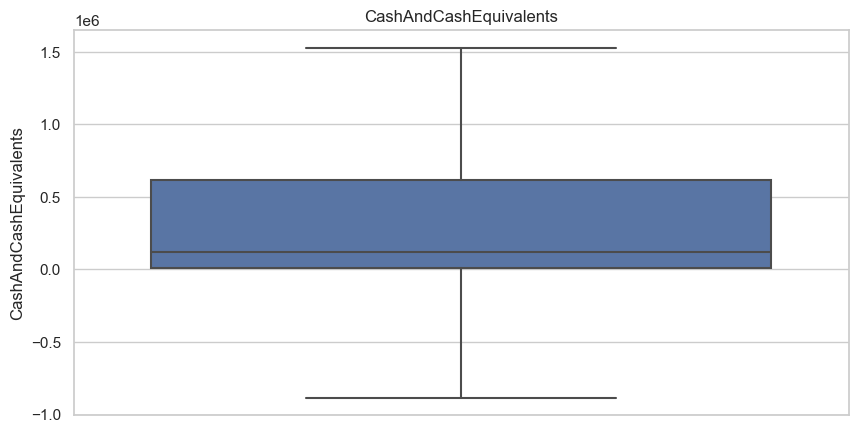

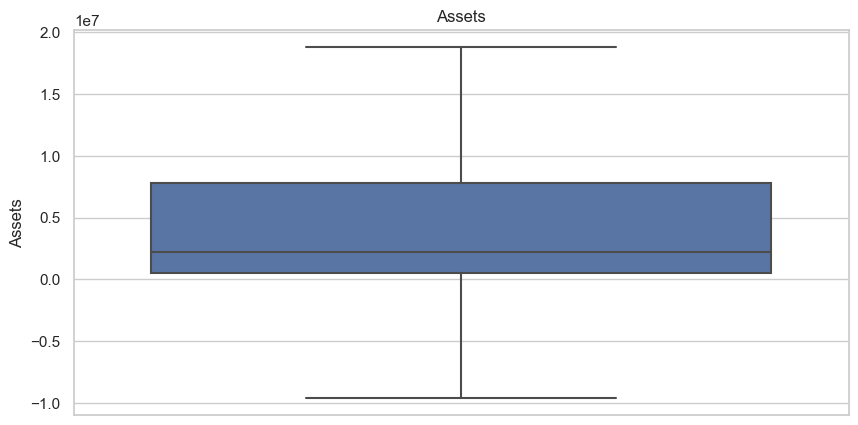

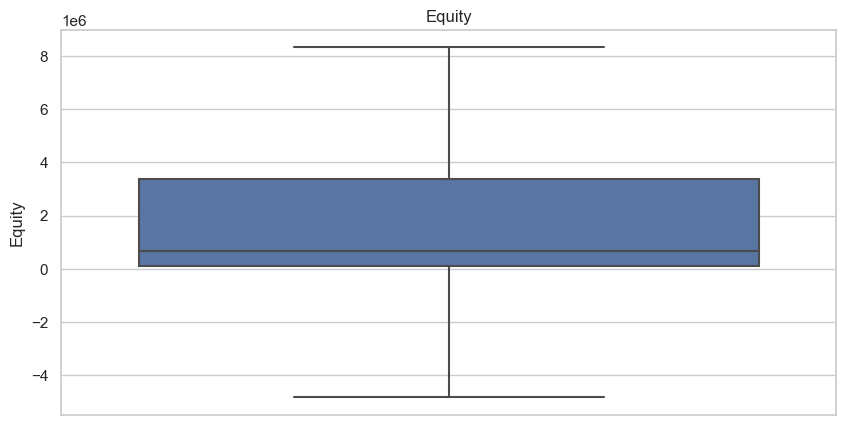

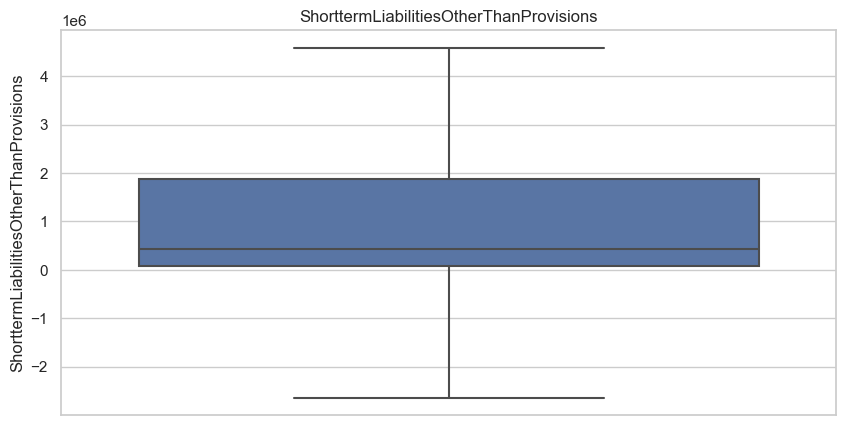

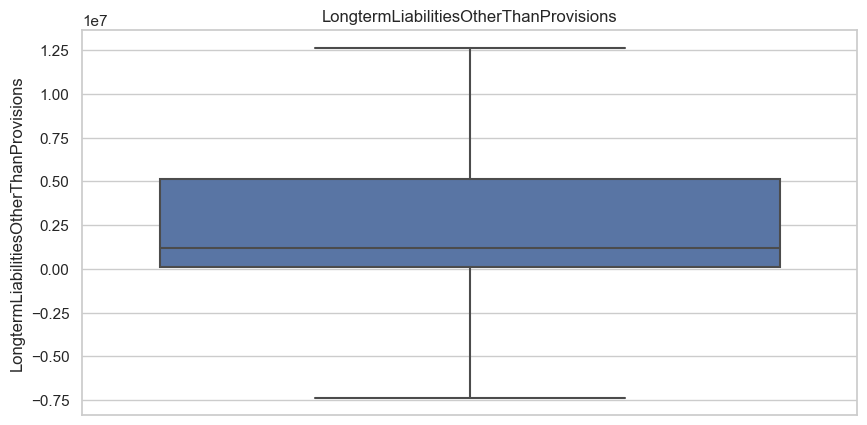

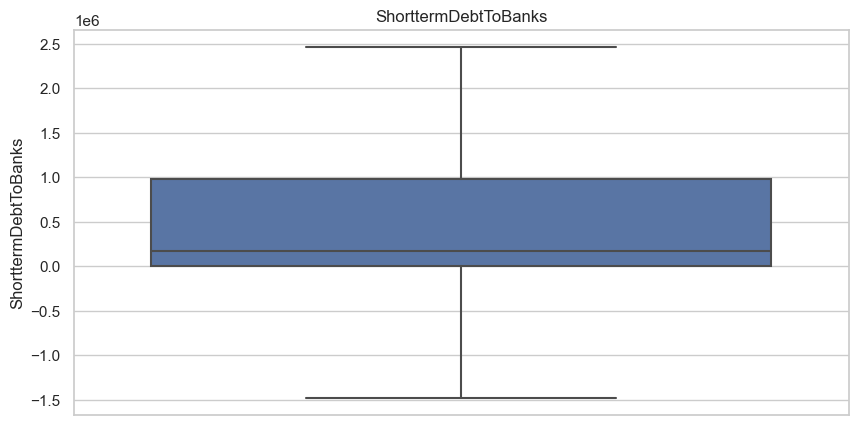

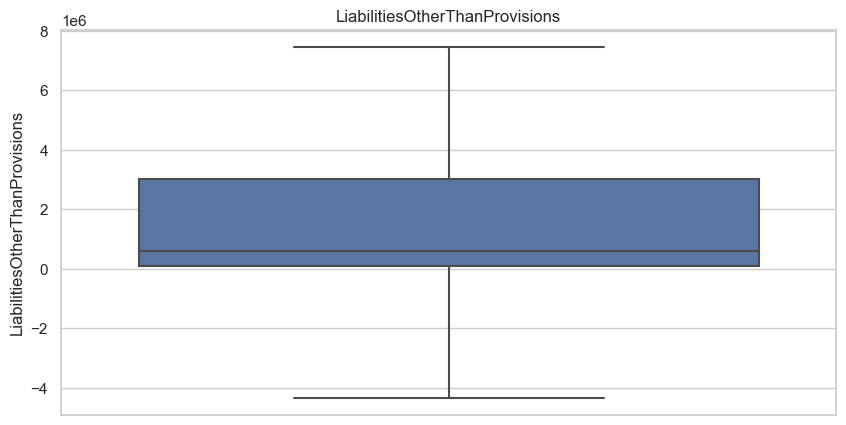

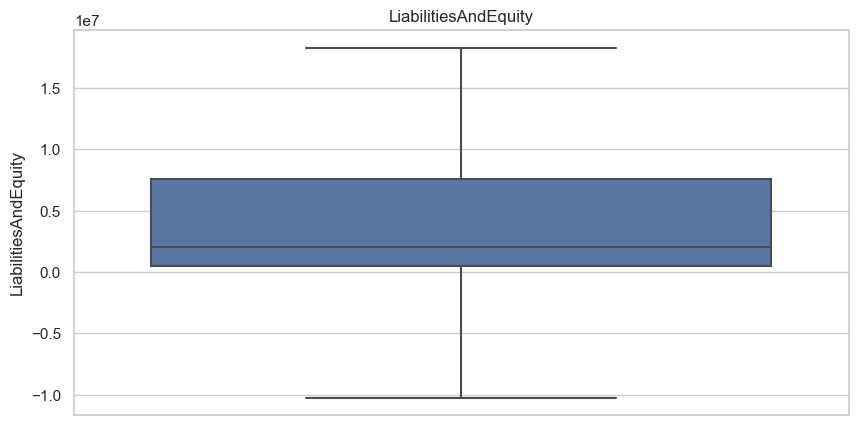

In [59]:
#plot the distribution of each of the selected keys in the dataset as a boxplot

for i in range(len(selected_keys)):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, y=selected_keys[i],showfliers=False)
    plt.ylabel(selected_keys[i])
    plt.title(f'{selected_keys[i]}')
    plt.show()


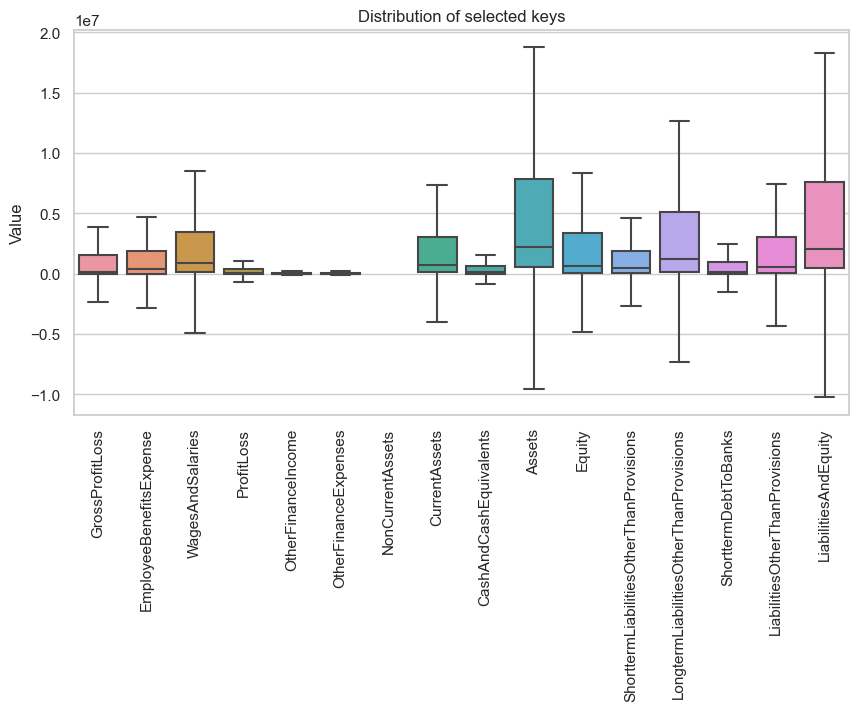

In [63]:
#plot the distribution of each of the selected keys in the dataset as a boxplot
#in one plot

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_keys], showfliers=False)
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.title('Distribution of selected keys')
plt.show()


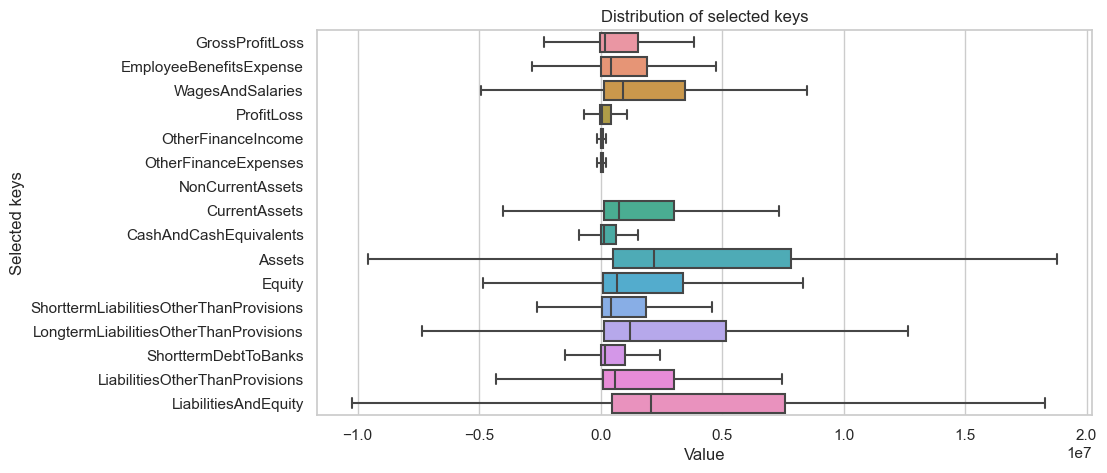

In [64]:
#flip it so keys are on y-axis and values on x-axis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_keys].melt(), x='value', y='variable', showfliers=False)
plt.xlabel('Value')
plt.ylabel('Selected keys')
plt.title('Distribution of selected keys')
plt.show()

## Profit vs. No. employees

In [37]:
#load employee count number data

folder = r'/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/Tables/EmployeeCounts'
files = os.listdir(folder)
dfs_em = []
for file in files:
    path = folder + '/' + file
    df_em = pd.read_csv(path, index_col=0)
    dfs_em.append(df_em)

#concatenate all dataframes
df_em = pd.concat(dfs_em, axis=0)

In [38]:
df_em

,CVR,FromDate,ChangeType,EmployeeCounts
0,34580413,2015-04-01,EmployeeCount,1
1,34580413,2015-05-01,EmployeeCount,1
2,34580413,2015-06-01,EmployeeCount,1
3,34580413,2015-07-01,EmployeeCount,1
4,34580413,2015-08-01,EmployeeCount,1
...,...,...,...,...
310638,38680226,2021-08-01,EmployeeCount,10
310639,38680226,2021-09-01,EmployeeCount,8
310640,38680226,2021-10-01,EmployeeCount,7
310641,38680226,2017-04-01,EmployeeCount,1


In [69]:
#group by CVR, year and take max of employee count
df_em['Year'] = df_em['FromDate'].str.extract(r'(\d{4})')

df_em_group  = df_em.groupby(['CVR', 'Year'])['EmployeeCounts'].max().reset_index()

In [67]:
df_em_group

,CVR,FromDate,ChangeType,EmployeeCounts,Year
0,34580413,2015-04-01,EmployeeCount,1,2015
1,34580413,2015-05-01,EmployeeCount,1,2015
2,34580413,2015-06-01,EmployeeCount,1,2015
3,34580413,2015-07-01,EmployeeCount,1,2015
4,34580413,2015-08-01,EmployeeCount,1,2015
...,...,...,...,...,...
310638,38680226,2021-08-01,EmployeeCount,10,2021
310639,38680226,2021-09-01,EmployeeCount,8,2021
310640,38680226,2021-10-01,EmployeeCount,7,2021
310641,38680226,2017-04-01,EmployeeCount,1,2017


In [44]:
#transform cvr into int64
df['CVR'] = df['CVR'].astype('int64')
df

,CVR,PublicationDate,AuditClass,ReportType,Currency,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,...,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity,audit_class
0,41624310,2013-12-16,Regnskabsklasse B,Årsrapport,DKK,NaN,1361.0,NaN,618673.0,115949.0,...,581640.0,17682.0,581640.0,-839012.0,1420652.0,NaN,NaN,1420652.0,581640.0,B
1,10287979,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,2993428.0,2619814.0,NaN,80576.0,54239.0,...,3698449.0,1133093.0,4590388.0,3218880.0,1079605.0,212398.0,NaN,1292003.0,4590388.0,B
2,25976436,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,-43640.0,NaN,NaN,3023764.0,204206.0,...,7287042.0,2954284.0,14457851.0,14418040.0,36204.0,NaN,NaN,36204.0,14457851.0,B
3,25982908,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,126883.0,14210.0,...,517064.0,166587.0,1242686.0,1239561.0,3125.0,NaN,NaN,3125.0,1242686.0,B
4,21330507,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,-10325.0,NaN,NaN,70884.0,120980.0,...,328023.0,153500.0,1596309.0,1144293.0,452016.0,NaN,NaN,452016.0,1596309.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15122943,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,521981.0,NaN,43541.0,2612.0,...,121567.0,120463.0,388767.0,274950.0,103617.0,10200.0,NaN,113817.0,388767.0,B
9994,27917836,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,588000.0,NaN,NaN,1221000.0,590000.0,...,5843000.0,1303000.0,7657000.0,6394000.0,1213000.0,NaN,NaN,1213000.0,7657000.0,B
9995,28332009,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,2375753.0,22796.0,...,1965299.0,14921.0,27941284.0,10011785.0,3033511.0,14454988.0,NaN,17488499.0,27941284.0,B
9996,19376613,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,-410490.0,-399152.0,-780950.0,85931.0,...,731554.0,NaN,61461031.0,18563013.0,15046197.0,22543666.0,7167820.0,37589863.0,61461031.0,B


In [47]:
#merge the financial data with the employee count data
#join on CVR and the closest date to publication date in the financial data
#the two date columns are 'PublicationDate' in the financial data and 'FromDate' in the employee count data

df_merged = pd.merge_asof(df, df_em, left_on='PublicationDate', right_on='FromDate', by='CVR')
df_merged

MergeError: Incompatible merge dtype, dtype('O') and dtype('O'), both sides must have numeric dtype

In [53]:
#find min publication date in df
df['PublicationDate'] = pd.to_datetime(df['PublicationDate'])
min_pub_date = df['PublicationDate'].min()

In [54]:
min_pub_date

Timestamp('2013-01-01 00:00:00')